<!-- Importing Required Modules -->

<!-- Importing Required Modules -->

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<!-- Reading Files -->

In [5]:
airways = pd.read_csv("customer_booking (1).csv", encoding='ISO-8859-1')

<!-- Data Describing -->

In [7]:
airways.shape

(50000, 14)

In [8]:
airways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
airways.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
airways.duplicated().sum()

719

In [11]:
airways.drop_duplicates(inplace=True)

In [12]:
airways.duplicated().sum()

0

In [13]:
airways.shape

(49281, 14)

In [14]:
airways

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [15]:
airways.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,49281.0,1.590187,1.016538,1.00,1.00,1.00,2.00,9.0
purchase_lead,49281.0,84.723281,90.410229,0.00,21.00,51.00,115.00,867.0
length_of_stay,49281.0,23.053976,33.832149,0.00,5.00,17.00,28.00,778.0
flight_hour,49281.0,9.070676,5.413099,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,49281.0,0.668229,0.470854,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,49281.0,0.295631,0.456331,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,49281.0,0.426635,0.494593,0.00,0.00,0.00,1.00,1.0
flight_duration,49281.0,7.279974,1.496390,4.67,5.62,7.57,8.83,9.5
booking_complete,49281.0,0.149977,0.357052,0.00,0.00,0.00,0.00,1.0


In [16]:
airways.describe(include='object').T

,count,unique,top,freq
sales_channel,49281,2,Internet,43917
trip_type,49281,3,RoundTrip,48779
flight_day,49281,7,Mon,7988
route,49281,799,AKLKUL,2620
booking_origin,49281,104,Australia,17691


<!-- Categorical Data Visualization  -->

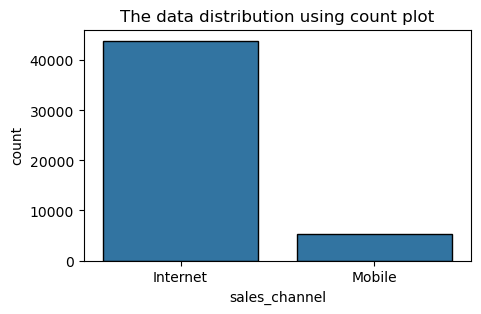

In [18]:
def categorical_text(input_text):
    plt.figure(figsize=(5,3))
    sns.countplot(x=input_text,data=airways,edgecolor='black')
    plt.title('The data distribution using count plot')
    plt.show()
categorical_text(airways['sales_channel'])                     

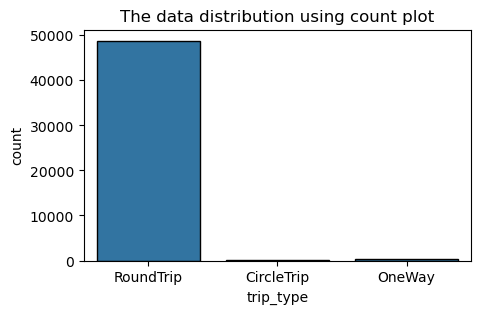

In [19]:
categorical_text(airways['trip_type'])

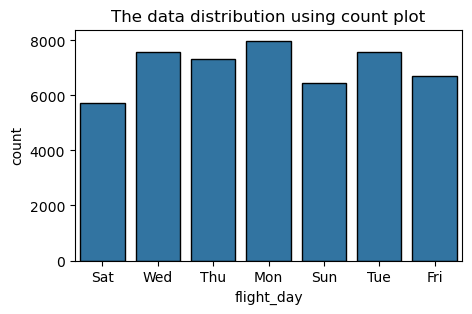

In [20]:
categorical_text(airways['flight_day'])

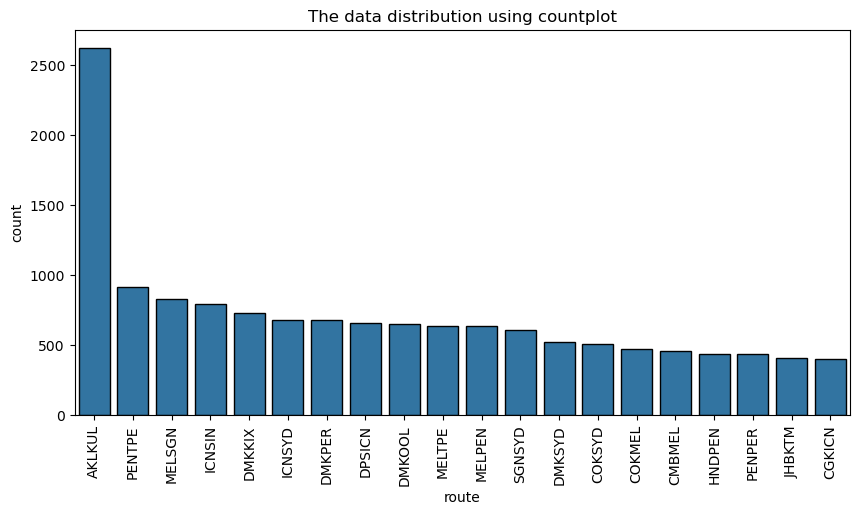

In [21]:
top_10=airways['route'].value_counts().head(20).sort_values(ascending=False).index
filter_col=airways[airways['route'].isin(top_10)]
plt.figure(figsize=(10,5))
sns.countplot(x='route',data=filter_col,order=top_10,edgecolor='black')
plt.xticks(rotation=90)
plt.title('The data distribution using countplot')
plt.show()

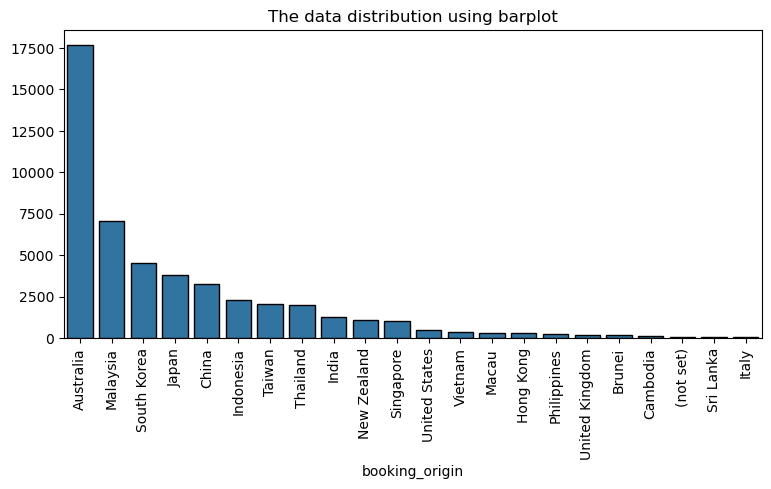

In [22]:
top_20=airways['booking_origin'].value_counts().head(22).sort_values(ascending=False)
plt.figure(figsize=(9,4))
sns.barplot(x=top_20.index,y=top_20.values,edgecolor='black')
plt.xticks(rotation=90)
plt.title('The data distribution using barplot')
plt.show()


<!-- Numerical Data Visualization -->

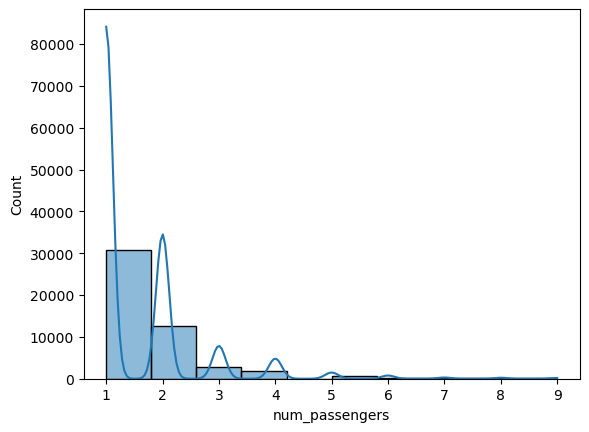

In [24]:
def numerical_values(input_text):
    sns.histplot(x=input_text,kde=True,bins=10,edgecolor='black')
    plt.show()
numerical_values(airways['num_passengers'])

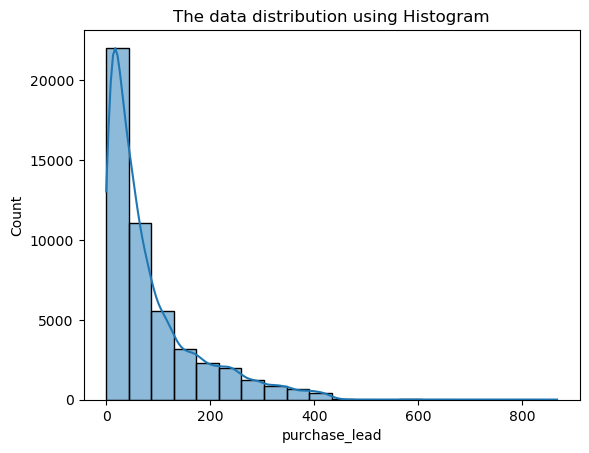

In [25]:
sns.histplot(x=airways['purchase_lead'],bins=20,kde=True,edgecolor='black')
plt.title('The data distribution using Histogram')
plt.show()

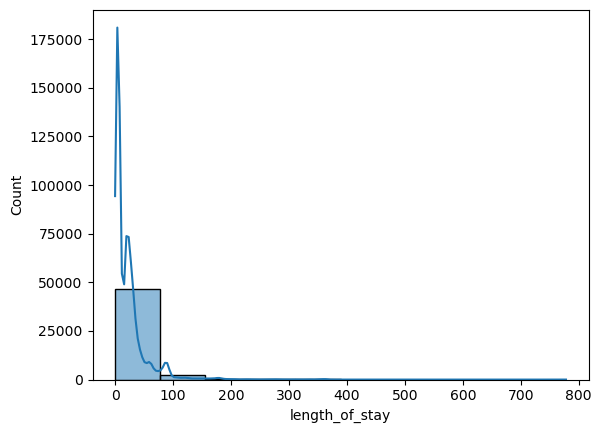

In [26]:
numerical_values(airways['length_of_stay'])

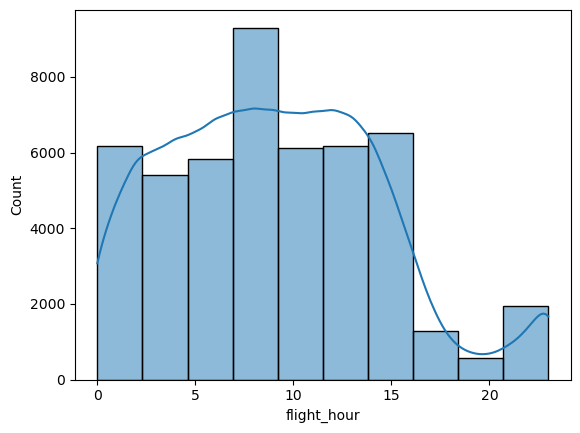

In [27]:
numerical_values(airways['flight_hour'])

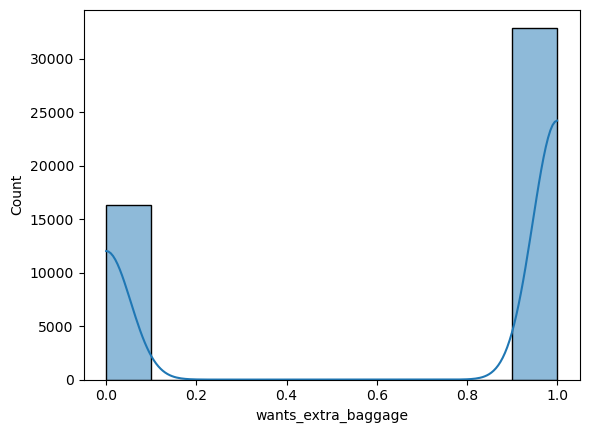

In [28]:
numerical_values(airways['wants_extra_baggage'])

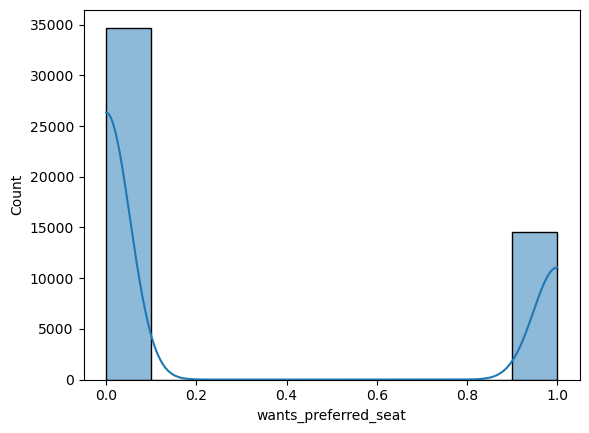

In [29]:
numerical_values(airways['wants_preferred_seat'])

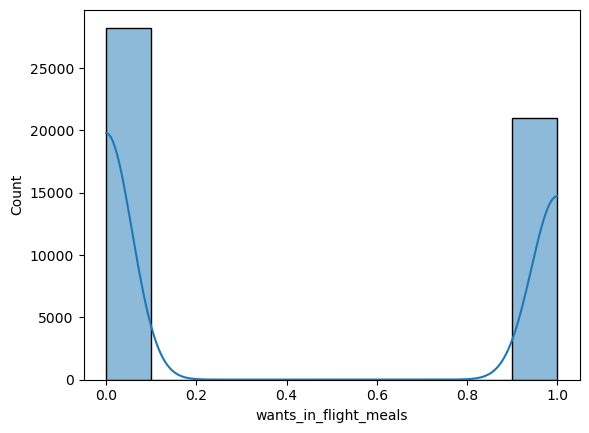

In [30]:
numerical_values(airways['wants_in_flight_meals'])

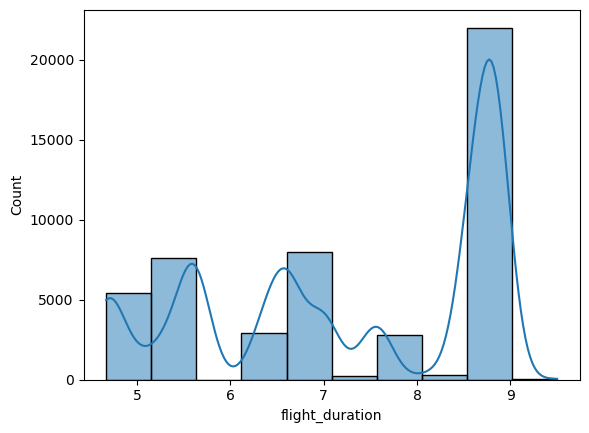

In [31]:
numerical_values(airways['flight_duration'])

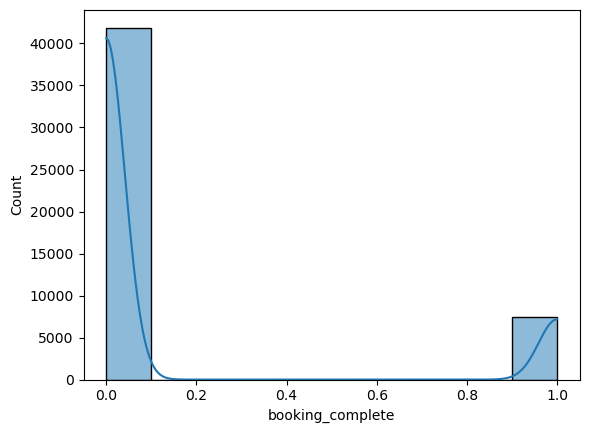

In [32]:
numerical_values(airways['booking_complete'])

<!-- Outliers -->

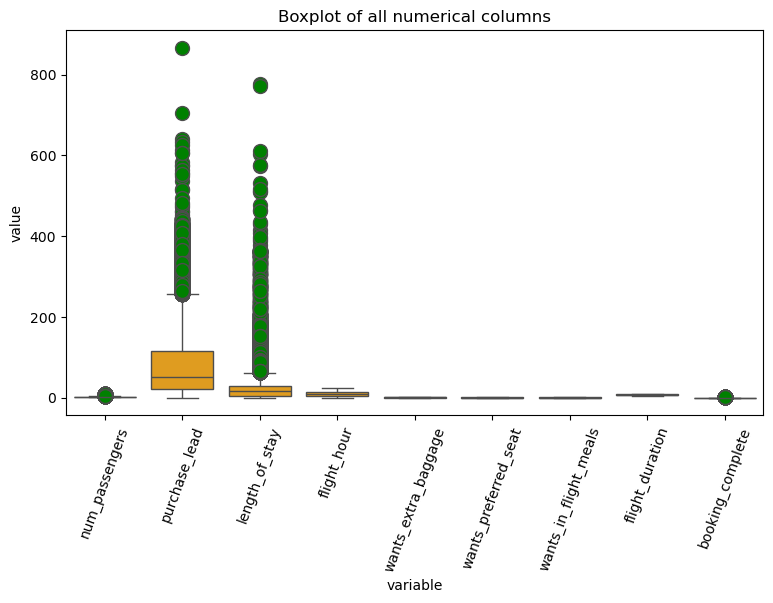

In [34]:
conversion=airways.select_dtypes(include='number').melt()
plt.figure(figsize=(9,5))
flierprops=dict(markerfacecolor='green',markersize=10)
sns.boxplot(x='variable',y='value',data=conversion,color='orange',flierprops=flierprops)
plt.xticks(rotation=70)
plt.title('Boxplot of all numerical columns')
plt.show()

<!-- How many passengers are booking through each sales channel? -->

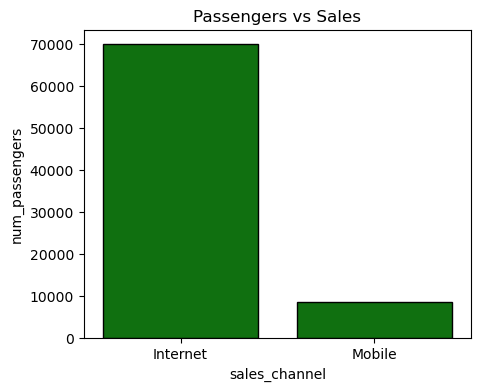

In [36]:
sales_passenger=airways.groupby('sales_channel')['num_passengers'].sum().reset_index()
plt.figure(figsize=(5,4))
sns.barplot(x='sales_channel',y='num_passengers',data=sales_passenger,color='green',edgecolor='black')
plt.title('Passengers vs Sales')
plt.show()

<!-- Which sales channel has the highest proportion of completed bookings? -->

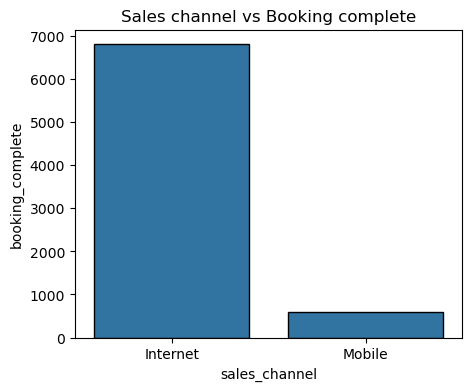

In [38]:
sales_booking=airways.groupby('sales_channel')['booking_complete'].sum().reset_index()
plt.figure(figsize=(5,4))
sns.barplot(x='sales_channel',y='booking_complete',data=sales_booking,edgecolor='black')
plt.title('Sales channel vs Booking complete')
plt.show()

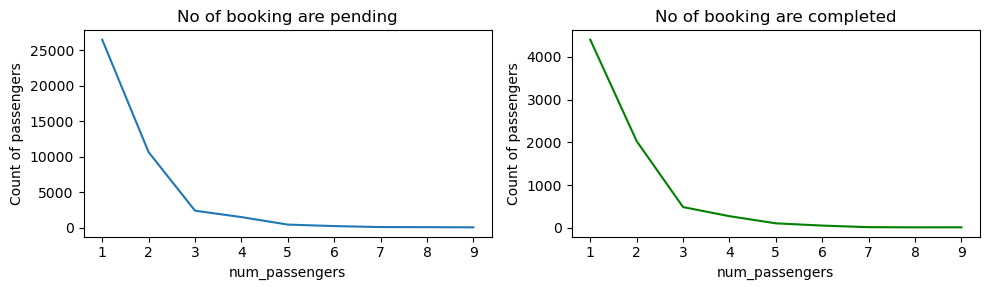

In [39]:
relation=pd.crosstab(airways['num_passengers'],airways['booking_complete']).reset_index()
new_column=relation.columns=['num_passengers','Pending','Done']
fig,axes=plt.subplots(1,2,figsize=(10,3))
sns.lineplot(x='num_passengers',y='Pending',data=relation,ax=axes[0])
axes[0].set_title('No of booking are pending')
axes[0].set_ylabel('Count of passengers')

sns.lineplot(x='num_passengers',y='Done',data=relation,ax=axes[1],color='green')
axes[1].set_title('No of booking are completed')
axes[1].set_ylabel('Count of passengers')
plt.tight_layout()
plt.show()


# How does the number of passengers vary across different trip types (one-way vs round-trip)?

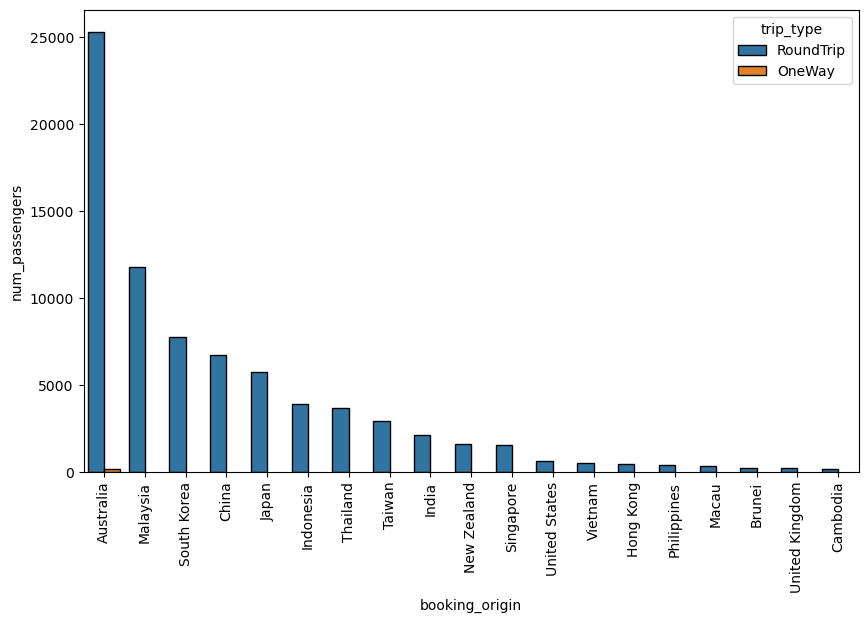

In [41]:
pass_trip_book=airways.groupby(['booking_origin','trip_type'])['num_passengers'].sum().reset_index().sort_values(by='num_passengers',ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x='booking_origin',y='num_passengers',data=pass_trip_book,edgecolor='black',hue='trip_type')
plt.xticks(rotation=90)
plt.show()


In [42]:
airways['booking_complete']=airways['booking_complete'].astype('int')

In [43]:
booking_no=airways[airways['booking_complete']==0]

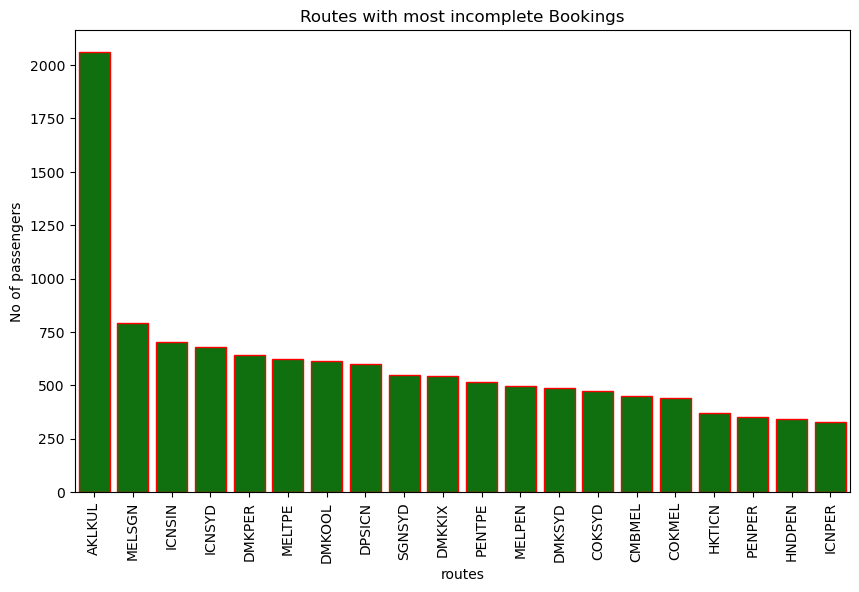

In [44]:
pending=booking_no.groupby('route').count().sort_values(by='booking_complete',ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x='route',y='booking_complete',data=pending,edgecolor='red',color='green')
plt.title('Routes with most incomplete Bookings')
plt.xlabel('routes')
plt.ylabel('No of passengers')
plt.xticks(rotation=90)
plt.show()

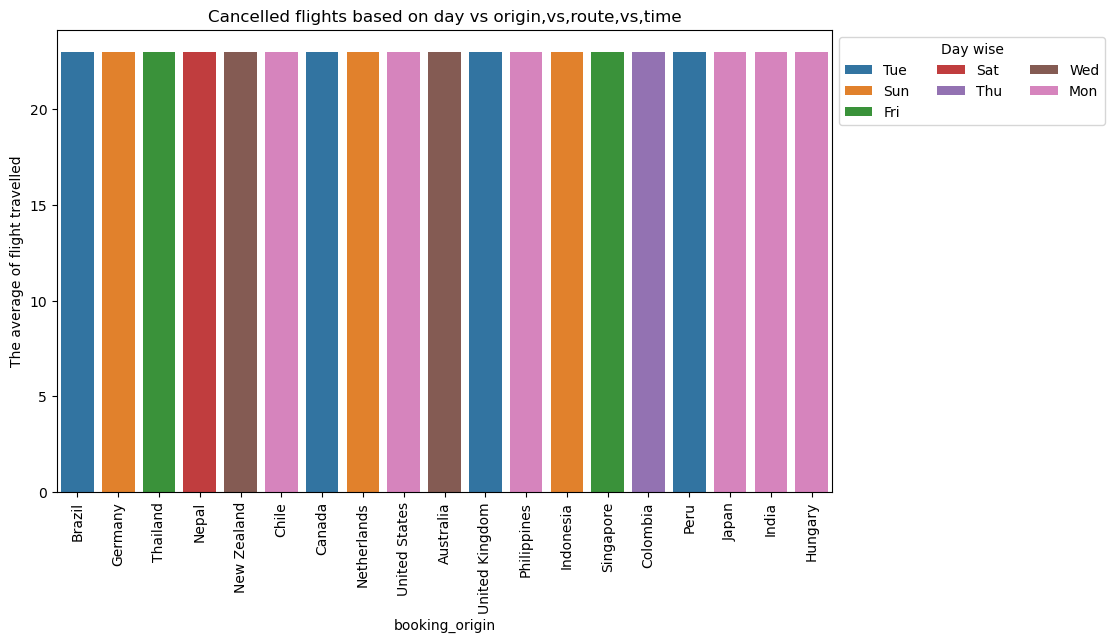

In [45]:
not_booked=airways[airways['booking_complete']==0]
long_flight_details=not_booked.groupby(['route','booking_origin','flight_day'])['flight_hour'].mean().reset_index().sort_values(by='flight_hour',ascending=False).head(30)
plt.figure(figsize=(10,6))
sns.barplot(x='booking_origin',y='flight_hour',data=long_flight_details,hue='flight_day',dodge=False)
plt.ylabel('The average of flight travelled')
plt.legend(title='Day wise',fontsize=10,bbox_to_anchor=(1,1),ncols=3)
plt.title("Cancelled flights based on day vs origin,vs,route,vs,time")
plt.xticks(rotation=90)
plt.show()

In [46]:
X=airways.drop(columns=['booking_complete'])
X.shape

(49281, 13)

In [47]:
y=airways['booking_complete']
y.shape

(49281,)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39424, 13)
(39424,)
(9857, 13)
(9857,)


# Selecting numerical data columns

In [50]:
X_train_numerical=pd.DataFrame(X_train).select_dtypes(include='number')
X_test_numerical=pd.DataFrame(X_test).select_dtypes(include='number')
print(X_train_numerical.shape)
print(X_test_numerical.shape)

(39424, 8)
(9857, 8)


# Selecting categorical data columns

In [52]:
X_train_categorical=pd.DataFrame(X_train).select_dtypes(include='object')
X_test_categorical=pd.DataFrame(X_test).select_dtypes(include='object')
print(X_train_categorical.shape)
print(X_test_categorical.shape)

(39424, 5)
(9857, 5)


# Applying standared scaler

In [54]:
from sklearn.preprocessing import StandardScaler
scaler_model=StandardScaler()
X_train_numerical_transform=scaler_model.fit_transform(X_train_numerical)
X_test_numerical_transform=scaler_model.fit_transform(X_test_numerical)
print(X_train_numerical_transform.shape)
print(X_test_numerical_transform.shape)

(39424, 8)
(9857, 8)


# Applying Ordinal Encoder

In [56]:
from sklearn.preprocessing import OrdinalEncoder
coder_model=OrdinalEncoder()
X_train_categorical_transform=coder_model.fit_transform(X_train_categorical)
X_test_categorical_transform=coder_model.fit_transform(X_test_categorical)
print(X_train_categorical_transform.shape)
print(X_test_categorical_transform.shape)

(39424, 5)
(9857, 5)


# Combining the the Numerical Data                                                  

In [58]:
X_train=np.concatenate([X_train_numerical_transform,X_train_categorical_transform],axis=1)

In [59]:
X_test=np.concatenate([X_test_numerical_transform,X_test_categorical_transform],axis=1)

In [213]:
new_column=airways.drop(columns=['booking_complete']).columns.to_list()
new_column

['num_passengers',
 'sales_channel',
 'trip_type',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration']

In [60]:
print(X_train.shape)

(39424, 13)


In [61]:
print(X_test.shape)

(9857, 13)


In [62]:
print(y_train.shape)

(39424,)


# Finding best feature for the model

In [175]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [177]:
y_test_predict=tree_model.predict(X_test)
y_test_predict

array([0, 0, 0, ..., 0, 0, 0])

In [179]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_test_predict)
print(score)


0.8498528964187887


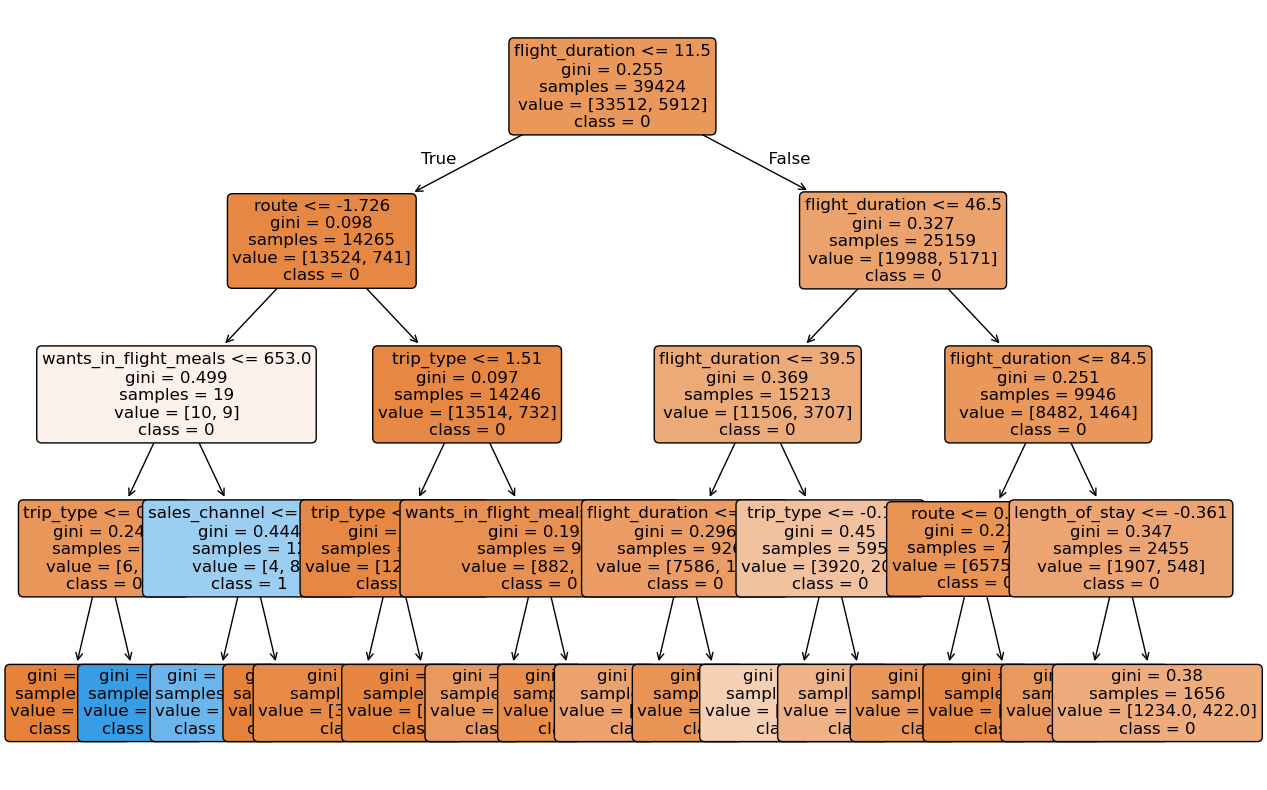

In [223]:
plt.figure(figsize=(15,10))
f=plot_tree(tree_model,
           feature_names=new_column,
            class_names=[str(cls) for cls in tree_model.classes_],
           filled=True,
           rounded=True,
           fontsize=12
           
)
plt.show()

In [215]:
tree_model.feature_importances_

array([0.        , 0.00240116, 0.04856794, 0.        , 0.01144691,
       0.        , 0.        , 0.03681069, 0.        , 0.        ,
       0.        , 0.00490701, 0.8958663 ])

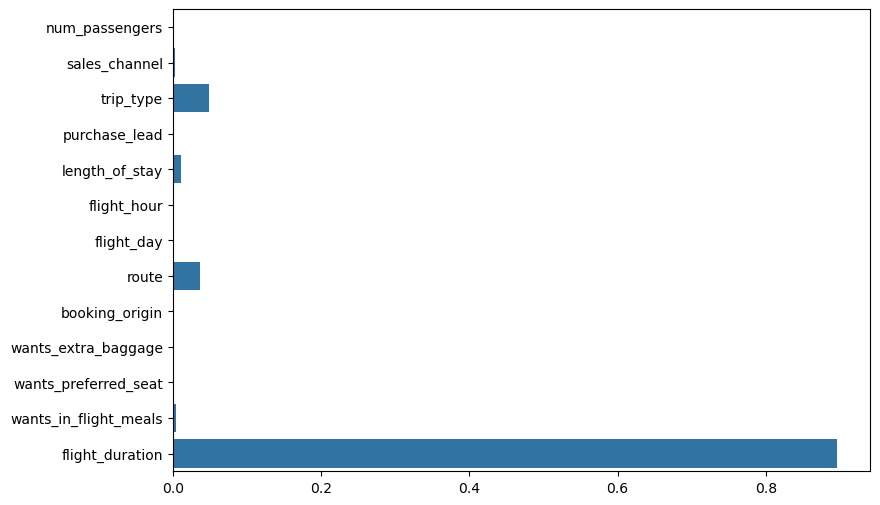

In [227]:
plt.figure(figsize=(9,6))
sns.barplot(x=tree_model.feature_importances_ ,y=new_column)
plt.show()

In [239]:
from scipy import stats

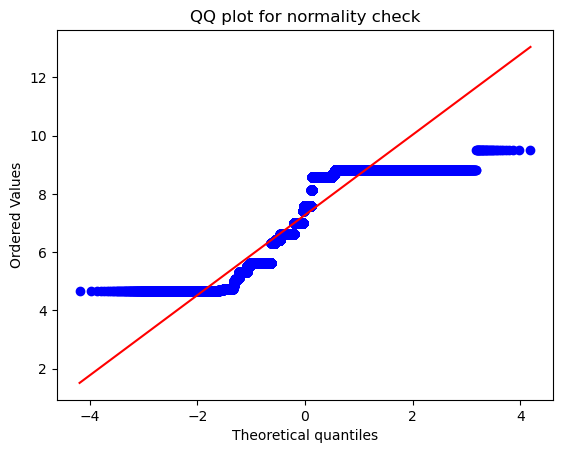

In [257]:
plot_q=stats.probplot(airways['flight_duration'],dist=stats.norm,plot=plt)
plt.title('QQ plot for normality check')
plt.show()

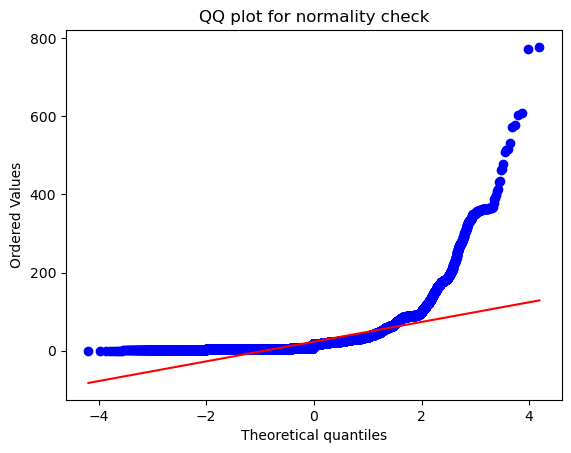

In [269]:
plot_q=stats.probplot(airways['length_of_stay'],dist=stats.norm,plot=plt)
plt.title('QQ plot for normality check')
plt.show()

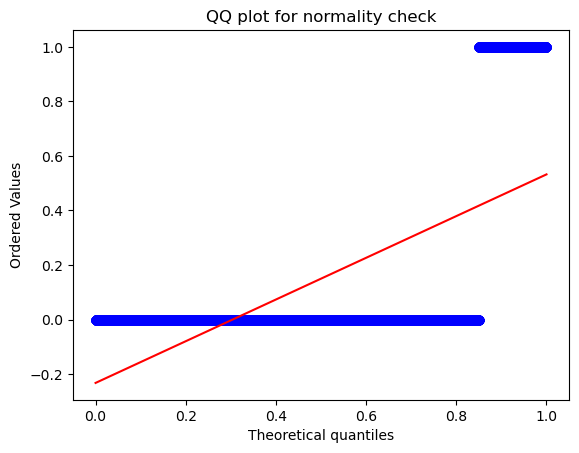

In [275]:
plot_q=stats.probplot(airways['booking_complete'],dist=stats.uniform,plot=plt)
plt.title('QQ plot for normality check')
plt.show()

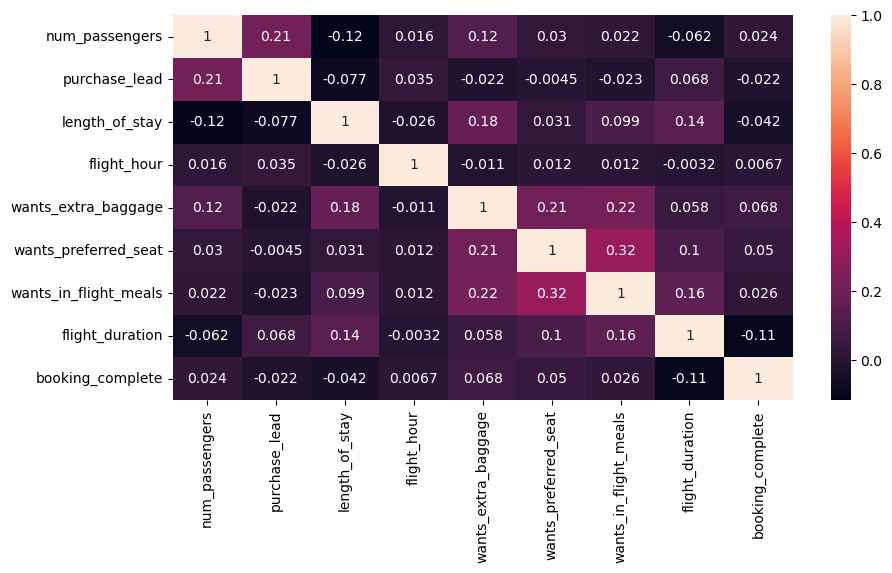

In [293]:
numerical=airways.select_dtypes(include='number')
relation=numerical.corr()
plt.figure(figsize=(10,5))
sns.heatmap(relation,annot=True)
plt.show()

# Random Forest 

The accuracy score of Random Forest Algorithm is : 0.8499543471644516


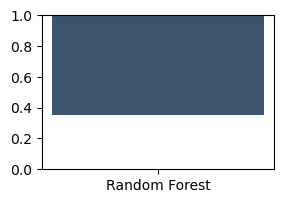

In [331]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forest_model=RandomForestClassifier(max_depth=4)
forest_model.fit(X_train,y_train)
y_test_predict=forest_model.predict(X_test)
score=accuracy_score(y_test,y_test_predict)
print(f'The accuracy score of Random Forest Algorithm is :',score)
plt.figure(figsize=(3,2))
graph=sns.histplot(x=['Random Forest'],y=score)
plt.ylim(0,1)
plt.show()